In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [9]:
# Load your dataset, replace 'data.csv' with your dataset file.
X_train_original = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv')

y_train_original = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv')

X_test_original = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_test_all.csv')

y_test_original = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_test_all.csv')

In [10]:
X_train_scaled = X_train_original / 255
X_test_scaled = X_test_original / 255

X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_scaled, y_train_original, test_size=0.2, random_state=42)

In [7]:
# Task 1: Measure accuracy on the training set
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        46
           1       0.83      0.82      0.83       451
           2       0.85      0.82      0.83       457
           3       0.90      0.84      0.87       288
           4       0.84      0.87      0.85       392
           5       0.74      0.84      0.79        44
           6       0.88      0.88      0.88        69
           7       0.69      0.81      0.75        47
           8       0.82      0.88      0.85        91
           9       0.64      0.72      0.68        53

    accuracy                           0.83      1938
   macro avg       0.79      0.82      0.81      1938
weighted avg       0.84      0.83      0.83      1938



In [8]:
# Task 2: Measure accuracy using 10-fold cross-validation
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy on cross-validation:", np.mean(cross_val_scores))

Cross-validation scores: [0.80927835 0.82860825 0.79354839 0.81290323 0.82064516 0.80516129
 0.81419355 0.83483871 0.80387097 0.7883871 ]
Mean accuracy on cross-validation: 0.8111434985034919


In [12]:
# Task 3: Split data into training and testing sets, then evaluate generalization
clf.fit(X_train_original, y_train_original)
y_test_pred = clf.predict(X_test_original)

print(classification_report(y_test_original, y_test_pred))

              precision    recall  f1-score   support

           0       0.26      0.35      0.30        60
           1       0.76      0.79      0.77       720
           2       0.74      0.76      0.75       750
           3       0.71      0.68      0.69       450
           4       0.71      0.72      0.72       660
           5       0.39      0.48      0.43        60
           6       0.54      0.47      0.50        90
           7       0.23      0.27      0.24        60
           8       0.65      0.43      0.51       150
           9       0.55      0.43      0.48        90

    accuracy                           0.69      3090
   macro avg       0.55      0.54      0.54      3090
weighted avg       0.69      0.69      0.69      3090



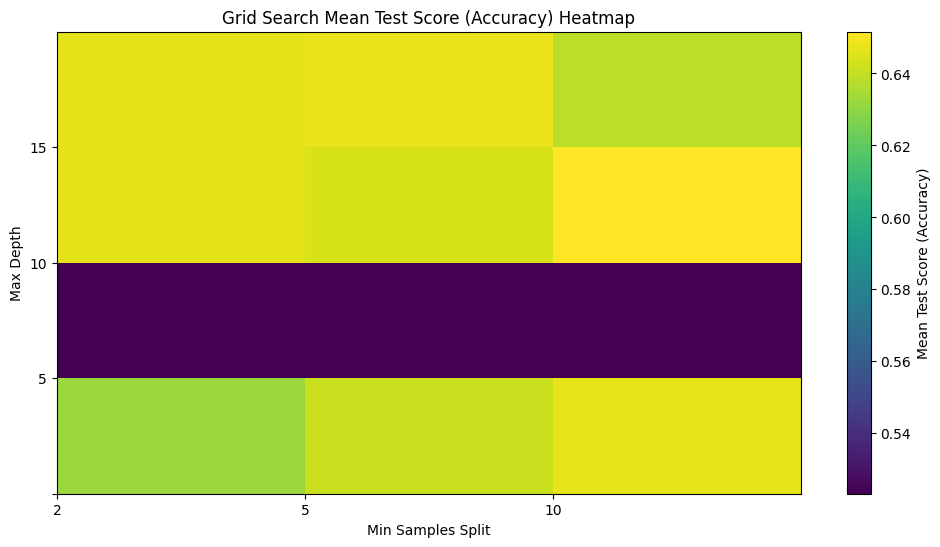

In [14]:
# Task 4: Experiment with decision tree parameters
# Define a parameter grid to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, # cv=5,
                           scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_original, y_train_original)

# Extract the grid search results
results = grid_search.cv_results_
param_max_depth = results['param_max_depth'].data.astype(np.float32)
param_min_samples_split = results['param_min_samples_split'].data.astype(
    np.float32)
param_min_samples_leaf = results['param_min_samples_leaf'].data.astype(
    np.float32)
mean_test_scores = results['mean_test_score']

# Reshape the results to create a heatmap
mean_test_scores = mean_test_scores.reshape(len(param_grid['max_depth']), len(
    param_grid['min_samples_split']), len(param_grid['min_samples_leaf']))

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(mean_test_scores[:, :, 0], cmap='viridis', origin='lower', aspect='auto', extent=[
           0, len(param_grid['min_samples_split']), 0, len(param_grid['max_depth'])])
plt.colorbar(label='Mean Test Score (Accuracy)')
plt.xlabel('Min Samples Split')
plt.xticks(np.arange(
    len(param_grid['min_samples_split'])), param_grid['min_samples_split'])
plt.ylabel('Max Depth')
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.title('Grid Search Mean Test Score (Accuracy) Heatmap')
plt.show()

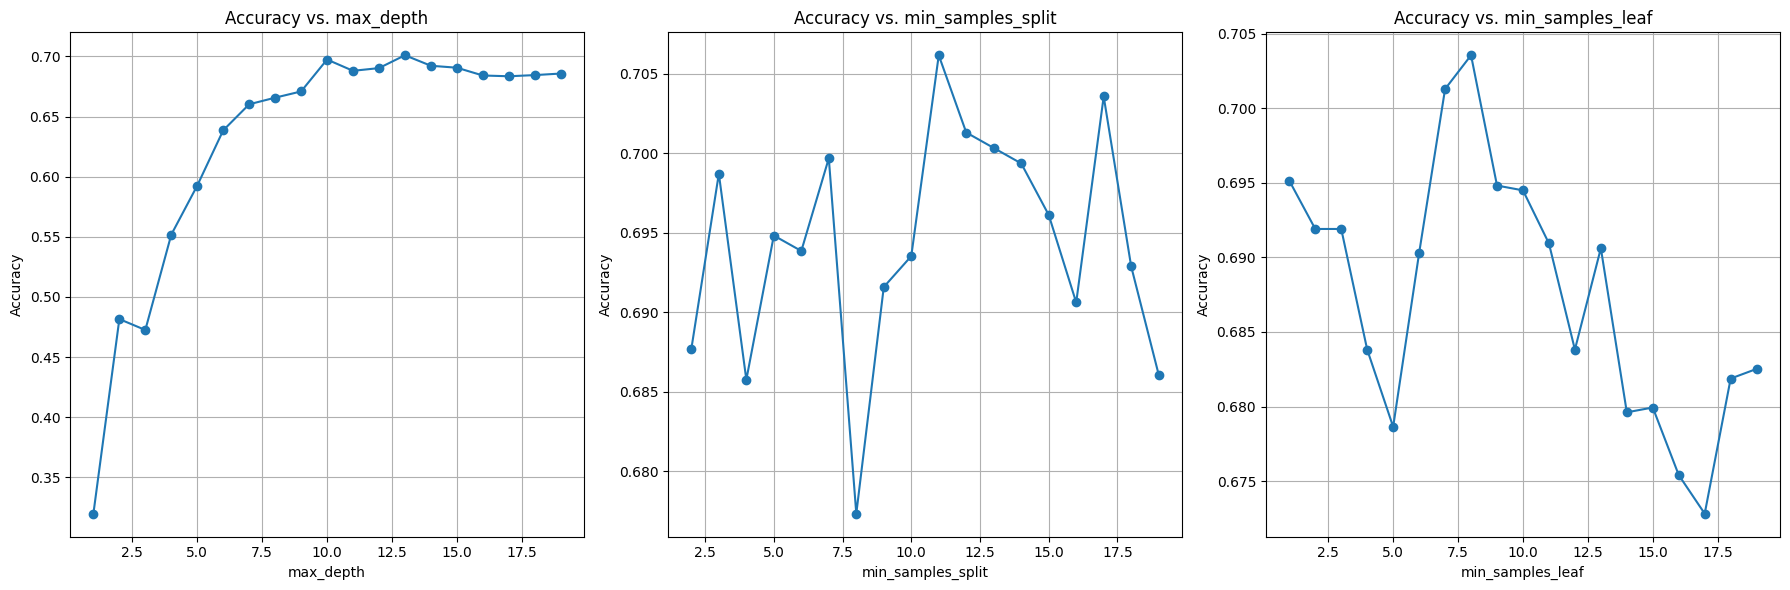

In [19]:
# Define a parameter grid to search over
param_grid = {
    'max_depth': range(1, 20),  # You can specify different values to test
    'min_samples_split': range(2, 20),
    'min_samples_leaf': range(1, 20)
}

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create subplots for each hyperparameter
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Loop over different hyperparameters and record accuracy
for i, (param_name, param_range) in enumerate(param_grid.items()):
    param_values = []
    accuracy_values = []

    for param_value in param_range:
        clf.set_params(**{param_name: param_value})
        clf.fit(X_train_original, y_train_original)
        y_test_pred = clf.predict(X_test_original)
        test_accuracy = accuracy_score(y_test_original, y_test_pred)
        param_values.append(param_value)
        accuracy_values.append(test_accuracy)

    # Create a line plot for accuracy vs. hyperparameter
    axs[i].plot(param_values, accuracy_values, marker='o')
    axs[i].set_xlabel(param_name)
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(f'Accuracy vs. {param_name}')
    axs[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [23]:
# Get the best hyperparameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [17]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

clf.fit(X_train_original, y_train_original)
y_test_pred = clf.predict(X_test_original)

print(classification_report(y_test_original, y_test_pred))

              precision    recall  f1-score   support

           0       0.30      0.28      0.29        60
           1       0.70      0.81      0.75       720
           2       0.74      0.79      0.76       750
           3       0.67      0.65      0.66       450
           4       0.73      0.72      0.72       660
           5       0.35      0.45      0.39        60
           6       0.60      0.34      0.44        90
           7       0.23      0.12      0.16        60
           8       0.68      0.38      0.49       150
           9       0.71      0.51      0.59        90

    accuracy                           0.69      3090
   macro avg       0.57      0.51      0.53      3090
weighted avg       0.68      0.69      0.68      3090



In [22]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_test_pred))

/var/folders/4w/m9s63hx144n554zlymqn4x7h0000gn/T/ipykernel_20061/3701186982.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        46
           1       0.95      0.97      0.96       451
           2       0.96      0.99      0.98       457
           3       0.99      0.98      0.98       288
           4       0.98      0.98      0.98       392
           5       1.00      0.93      0.96        44
           6       1.00      0.96      0.98        69
           7       1.00      0.98      0.99        47
           8       1.00      0.98      0.99        91
           9       1.00      0.96      0.98        53

    accuracy                           0.97      1938
   macro avg       0.99      0.96      0.97      1938
weighted avg       0.97      0.97      0.97      1938



In [20]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train_original, y_train_original)
y_test_pred = rf_model.predict(X_test_original)

print(classification_report(y_test_original, y_test_pred))

/var/folders/4w/m9s63hx144n554zlymqn4x7h0000gn/T/ipykernel_20061/2689333194.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_original, y_train_original)


              precision    recall  f1-score   support

           0       0.88      0.23      0.37        60
           1       0.74      0.85      0.79       720
           2       0.79      0.83      0.81       750
           3       0.77      0.80      0.78       450
           4       0.81      0.80      0.80       660
           5       0.91      0.53      0.67        60
           6       0.65      0.53      0.59        90
           7       0.94      0.27      0.42        60
           8       0.64      0.73      0.69       150
           9       0.83      0.49      0.62        90

    accuracy                           0.77      3090
   macro avg       0.80      0.61      0.65      3090
weighted avg       0.78      0.77      0.76      3090

